In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
data_train_path = '/content/drive/MyDrive/Project/Dataset/Training'
data_val_path = '/content/drive/MyDrive/Project/Dataset/Validation'

In [ ]:
img_width = 480
img_height = 320

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 965 files belonging to 5 classes.


In [ ]:
data_cat = data_train.class_names

In [ ]:
data_cat

['Grade 0', 'Grade 1', 'Grade 2', 'Grade 3', 'Normal(Healthy skin)']

In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=16,
                                                        shuffle=False,
                                                       validation_split=False)

Found 116 files belonging to 5 classes.


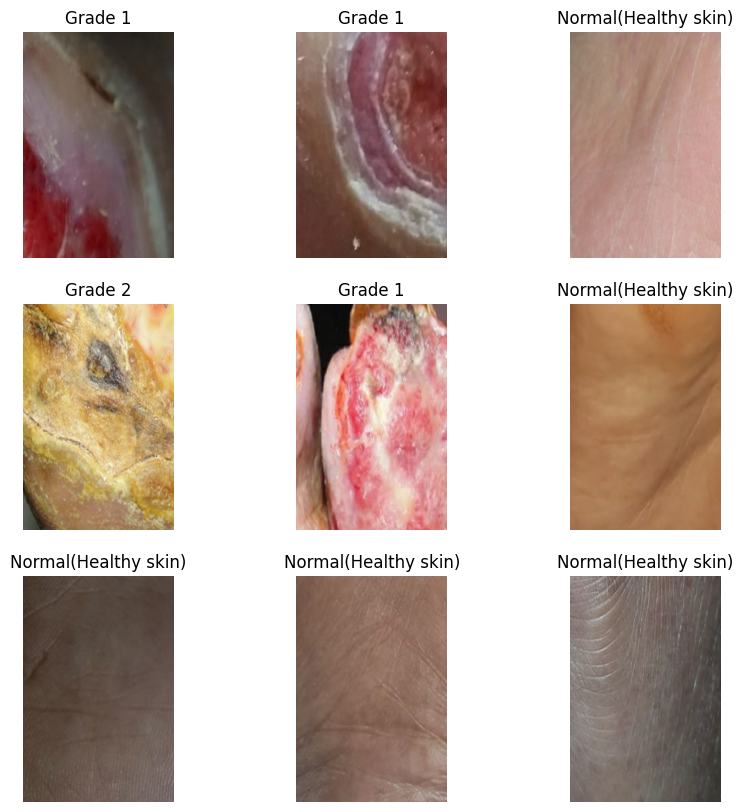

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(data_cat), activation='softmax')
])


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs_size = 20
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


31/31 [==============================] - 474s 15s/step - loss: 1.8278 - accuracy: 0.5409 - val_loss: 1.6878 - val_accuracy: 0.1724
Epoch 2/20
31/31 [==============================] - 466s 15s/step - loss: 1.0613 - accuracy: 0.6570 - val_loss: 1.1331 - val_accuracy: 0.5431
Epoch 3/20
31/31 [==============================] - 454s 15s/step - loss: 0.8616 - accuracy: 0.7368 - val_loss: 1.0397 - val_accuracy: 0.5862
Epoch 4/20
31/31 [==============================] - 439s 14s/step - loss: 0.7127 - accuracy: 0.7772 - val_loss: 0.9954 - val_accuracy: 0.6293
Epoch 5/20
31/31 [==============================] - 426s 14s/step - loss: 0.7533 - accuracy: 0.7658 - val_loss: 1.5137 - val_accuracy: 0.5259
Epoch 6/20
31/31 [==============================] - 432s 14s/step - loss: 0.6390 - accuracy: 0.8124 - val_loss: 1.0090 - val_accuracy: 0.5862
Epoch 7/20
31/31 [==============================] - 426s 14s/step - loss: 0.6001 - accuracy: 0.8207 - val_loss: 0.9197 - val_accuracy: 0.6207
Epoch 8/20
31/31 

Text(0.5, 1.0, 'Loss')

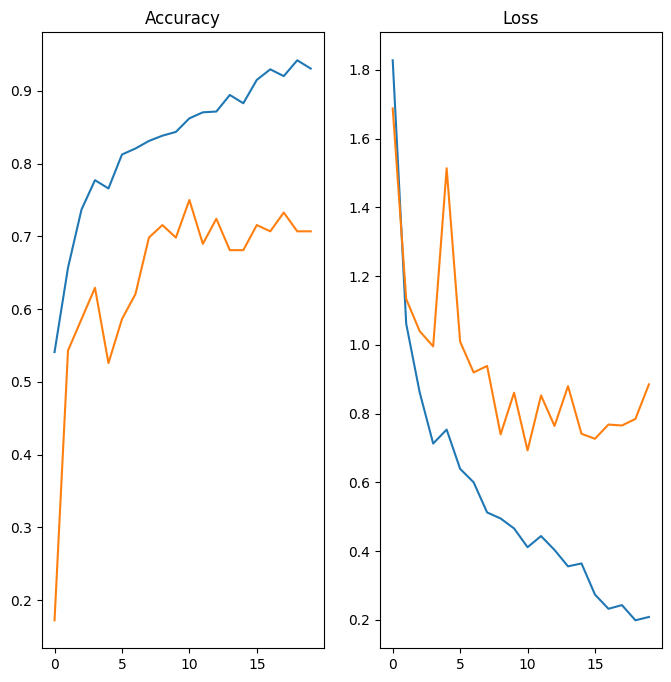

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [ ]:
# Evaluate the model on the validation set
val_predictions = model.predict(data_val)
val_labels = np.concatenate([labels for _, labels in data_val], axis=0)
val_predictions_classes = np.argmax(val_predictions, axis=1)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(val_labels, val_predictions_classes)

# Classification Report
from sklearn.metrics import classification_report
class_report = classification_report(val_labels, val_predictions_classes, target_names=data_cat)


8/8 [==============================] - 15s 2s/step


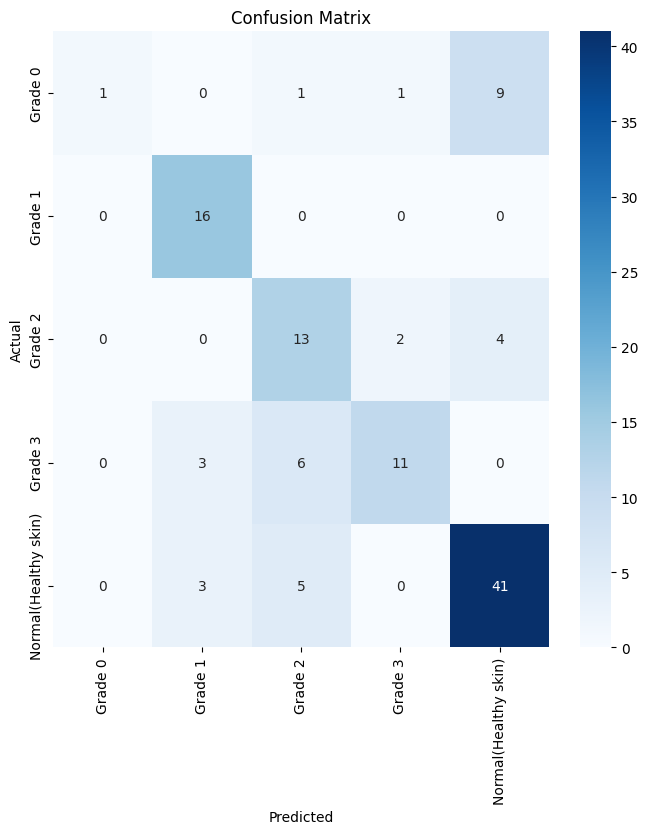

In [ ]:
!pip install seaborn

# Import the seaborn library
import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=data_cat, yticklabels=data_cat)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()